# Competition Name: Playground Series Season 5 Episode 1

## Overview of Kaggle Competition 

The primary objective of this project is to predict future sales for a retail chain by analyzing historical sales data. The analysis takes into account various influencing factors, such as the date, store attributes, and product details. By accurately forecasting future sales, the retail chain can optimize inventory management, plan promotional campaigns, and improve operational efficiency.

## DataSet Overview

1. **Training Data:**

    Contains historical sales records.
    Features include:
        Date: The specific day of the recorded sales.
        Store: Information about the store where the sales occurred.
        Product Category: Classification of products sold.
    Includes target variable: sales values, which are used for model training.
   
2. **Test Data:**

    Contains the same features as the training dataset, excluding the target sales values.
    The task involves predicting sales for the records in this dataset.

### Evaluation Metric

The model's performance will be evaluated using the Root Mean Squared Error (RMSE) metric. RMSE is calculated as follows:

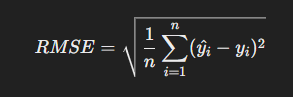

Where:

    𝑛 = Number of predictions.
    𝑦 = Predicted sales value
    𝑖 = Actual sales value.

A lower RMSE value indicates a better predictive model, as it signifies a smaller average error between predicted and actual sales.

### Competition Focus


This competition emphasizes time-series forecasting and structured data handling, with a particular focus on:

1. **Time-Series Forecasting Techniques:**

    Utilize models like ARIMA, SARIMA, and Prophet to capture temporal dependencies.
    Experiment with machine learning algorithms such as Gradient Boosting, Random Forest, or Neural Networks optimized for time-series data.

2. **Handling Complex Data Patterns:**

    Identify and model seasonal patterns in sales data, such as holidays or weekends.
    Account for promotional campaigns and other marketing efforts that influence sales.

3. **Feature Engineering:**

    Encode categorical variables like store and product categories.
    Handle missing values to ensure the dataset is complete and reliable.
    Incorporate external features such as holidays, weather conditions, and economic indicators to enhance the model's contextual understanding.

4. **Data Preprocessing:**

    Normalize and scale features for models sensitive to feature distributions.
    Create lagging or rolling features to capture recent trends in sales.

### Learning Opportunities

This project offers a robust platform to:

1. **Master Time-Series Forecasting:**

    Gain practical experience in handling temporal data.
    Learn to balance simplicity and complexity in model selection for time-series problems.

2. **Practice Regression Models:**

    Experiment with linear regression, decision trees, and ensemble methods.
    Develop hybrid models combining time-series techniques and regression.

3. **Enhance Feature Engineering Skills:**

    Explore the impact of adding lagged features, moving averages, and seasonal indicators.
    Incorporate domain-specific knowledge, such as promotional events or holiday effects, to boost model accuracy.

4. **Work with Evaluation Metrics:**

    Understand how RMSE reflects model accuracy.
    Learn to optimize hyperparameters to minimize RMSE while preventing overfitting.

# ***Let's start***

## Import Libraries

In [1]:
# Importing Numpy and Pandas for data processing and data wrangling
import pandas as pd
import numpy as np

# importing tools for visulaisation
import matplotlib.pyplot as plt
import seaborn as sns

# importing library used for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

#importing library for model selection
from sklearn.model_selection import train_test_split

#importing evaluation metric libraries
from sklearn.metrics import mean_absolute_percentage_error

# importing the tensorflow and keras model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam



## DataSet Loading

In [4]:
# load dataset from github repository

url_train = 'https://raw.github.com/Jatinyadav2183/Playground-Series-s5e1/main/train.csv'
url_test = 'https://raw.github.com/Jatinyadav2183/Playground-Series-s5e1/main/test.csv'

train_data = pd.read_csv(url_train)
test_data = pd.read_csv(url_test)

### DataSet First View

In [7]:
# View top 5 rows of dataset
train_data.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


### Dataset Rows and Columns count

In [10]:
# Checking number of rows and columns of the dataset using shape

print("Number of Rows are: ", train_data.shape[0])
print("Number of Columns are: ", train_data.shape[1])

Number of Rows are:  230130
Number of Columns are:  6


### Dataset Information


In [11]:
# Checking information about the dataset using info

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


### Duplicate Values

In [12]:
# Missing values / Null values count
train_data.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

# ***Preprocessing***

In [15]:
train_data.columns

Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [18]:
# Preprocessing
# Ensure date is converted properly
train_data['date'] = pd.to_datetime(train_data['date'], errors = 'coerce')

# Handel potential NaT values
if train_data['Date'].isna().any():
    print(" warning: some dates could not be parsed and are set to NaT. ")

# Extract Year, Month, and Day from Date
train_data['Year'] = train_data['date'].dt.year
train_data['Month'] = train_data['date'].dt.month
train_data['Day'] = train_data['date'].dt.day

# Drop unnecessary columns
train_data =  train_data.drop(['id','date'], axis = 1)

# Ensure 'Num_sold' is non-negative before applying log1p
if(train_data['num_sold'] < 0).any():
    raise ValueError(" Column 'num_sold' contains negative values.")

train_data['num_sold'] = np.log1p(train_data['num_sold'])

In [19]:
# Encode categorical columns

categorical_cols = ['country', 'store', 'product']

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    label_encoders[col] = le

In [22]:
# Split feature and target
X = train_data.drop('num_sold', axis =1)
y = train_data['num_sold']

In [24]:
# Splitting the data to train and test
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2, random_state=42)

# Emsure that X and Y have the same number of samples
train_data = train_data.dropna(subset=['num_sold'])

# Drop rows where 'num_sold' is NaN

# Split features and target again after dropping rows with NaN in the target
X = train_data.drop('num_sold',axis = 1)
y = train_data['num_sold']

#Ensure X contains only numberic value
X= X.select_dtypes(include=[np.number])

# Handle NaNs and infinities in X
X=X.replace([np.inf, -np.inf], np.nan).dropna()

# Ensure y is numeric and free of NaNs

y=y.astype(float)

# Splitting the data to train and test
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2, random_state=42)

# Scale input features

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# scale target variables
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1,1))
y_valid_scaled = target_scaler.transform(y_valid.values.reshape(-1,1))

#print shapes to ensure correctness

print(f"X_train_scaled Shape: {X_train_scaled.shape}")
print(f"y_trainy_train_scaled shape: {y_train_scaled.shape}")

# reshape inputs for LSTM
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_valid_reshaped = X_valid_scaled.reshape(X_valid_scaled.shape[0], 1, X_valid_scaled.shape[1])

# Print Reshaped output
print(f"X_train_reshaped Shape: {X_train_reshaped.shape}")
print(f"X_Valid_reshaped shape: {X_valid_reshaped.shape}")


X_train_scaled Shape: (177007, 6)
y_trainy_train_scaled shape: (177007, 1)
X_train_reshaped Shape: (177007, 1, 6)
X_Valid_reshaped shape: (44252, 1, 6)


## ***LSTM***  

In [39]:
from tensorflow.keras.layers import Dropout

# Build the model

lstm_model = Sequential()
lstm_model.add(LSTM(units= 50, activation='relu', return_sequences=True, input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, activation='relu',return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

# Compile the model

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss = 'mse')
lstm_model.summary()

# Train the Model
history = lstm_model.fit(X_train_reshaped, y_train_scaled, epochs=20, batch_size=32, validation_data=(X_valid_reshaped, y_valid_scaled))

C:\Users\yadav-jatin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                       │ (None, 1, 50)               │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 1, 50)               │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,851 (202.54 KB)

 Trainable params: 51,851 (202.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - loss: 0.4100 - val_loss: 0.0218
Epoch 2/20
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - loss: 0.0510 - val_loss: 0.0156
Epoch 3/20
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - loss: 0.0417 - val_loss: 0.0127
Epoch 4/20
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - loss: 0.0373 - val_loss: 0.0118
Epoch 5/20
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - loss: 0.0337 - val_loss: 0.0106
Epoch 6/20
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 0.0316 - val_loss: 0.0100
Epoch 7/20
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - loss: 0.0297 - val_loss: 0.0102
Epoch 8/20
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - loss: 0.0290 - val_loss: 0.0098
Epoch 9/20
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 0.0281 - val_loss: 0.0103
Epoch 10/20
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - loss: 0.0271 - val_loss: 0.0092
Epoch 11/20
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - loss: 0.0267 - val_loss: 0.0099
Epoch 12/20
5532/55

In [40]:
y_valid_pred = lstm_model.predict(X_valid_reshaped)
y_valid_pred = target_scaler.inverse_transform(y_valid_pred) 

# Convert predictions back to original scale
y_valid_pred_original = np.expm1(y_valid_pred)
print(y_valid_pred_original)

# Calculate MAPE on the validation data
mape = mean_absolute_percentage_error(np.expm1(y_valid), np.expm1(y_valid_pred))

print(f" LSTM Validation MAPE: {mape}")


1383/1383 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
[[1441.6826  ]
 [1013.09607 ]
 [ 298.6849  ]
 ...
 [  21.267021]
 [1242.8665  ]
 [1162.0994  ]]
 LSTM Validation MAPE: 0.10744628158313164


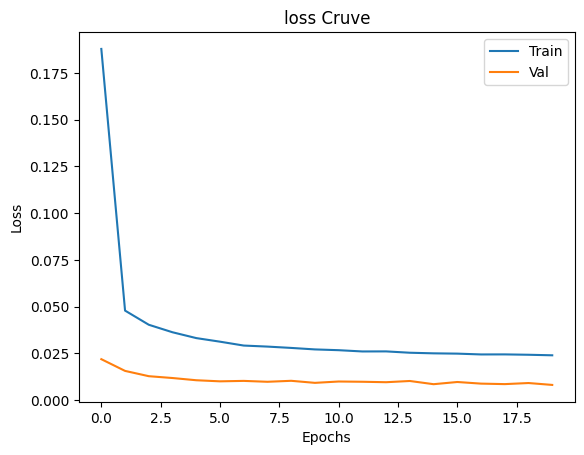

In [41]:
# plot the loss curve

plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Val')
plt.title("loss Cruve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## ***GRU***

In [43]:
# Initilize the GRU Model
gru_model = Sequential()

# Add a GRU Layer
gru_model.add(GRU(64, activation='relu', input_shape = (1, X_train_reshaped.shape[2])))

# Add a dense layer
gru_model.add(Dense(1))

# Compile the GRU model
gru_model.compile(optimizer='adam', loss = 'mse')

# Train the gru model
gru_model.fit(
    X_train_reshaped,y_train, epochs=50, batch_size=32, validation_data=(X_valid_reshaped, y_valid))

C:\Users\yadav-jatin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 4.7085 - val_loss: 0.7463
Epoch 2/50
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.4958 - val_loss: 0.0523
Epoch 3/50
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0425 - val_loss: 0.0254
Epoch 4/50
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.0198 - val_loss: 0.0168
Epoch 5/50
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0178 - val_loss: 0.0181
Epoch 6/50
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0164 - val_loss: 0.0155
Epoch 7/50
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0156 - val_loss: 0.0154
Epoch 8/50
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0154 - val_loss: 0.0142
Epoch 9/50
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0151 - val_loss: 0.0141
Epoch 10/50
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0150 - val_loss: 0.0139
Epoch 11/50
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0145 - val_loss: 0.0150
Epoch 12/50
5532/55

In [45]:
# Gru Predictions

gru_preds = np.expm1(gru_model.predict(X_valid_reshaped))
gru_mape = mean_absolute_percentage_error(np.expm1(y_valid), gru_preds)

print(f" GRU Validation MAPE: {gru_mape}")

1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
 GRU Validation MAPE: 0.08524008827431898


In [46]:
gru_preds

array([[1314.7603 ],
       [1023.6653 ],
       [ 320.03592],
       ...,
       [  22.20989],
       [1312.9684 ],
       [1032.5599 ]], dtype=float32)

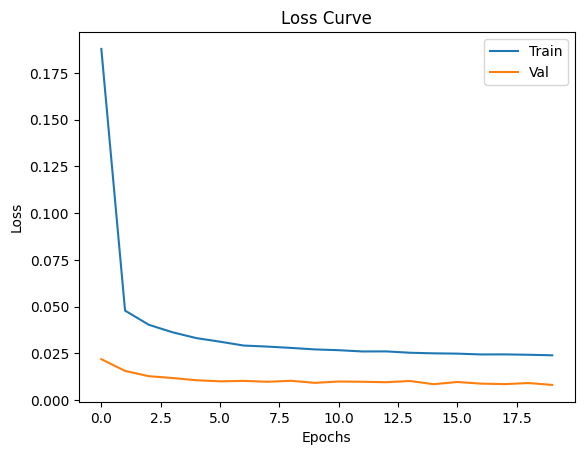

In [47]:
# Plot the loss curve

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [49]:
# Convert the 'data' column in test data to datetime format

test_data['date'] = pd.to_datetime(test_data['date'])

# Extract year, month, and day from the 'date' column

test_data['Year'] = test_data['date'].dt.year
test_data['Month'] = test_data['date'].dt.month
test_data['Day'] = test_data['date'].dt.day

# Drop Unnecessary columns
test_data = test_data.drop(['id', 'date'], axis = 1)

# Encode categorical columns in the test data
for col in categorical_cols:
    test_data[col] = label_encoders[col].transform(test_data[col])

# Extract the features for the test data
X_test = test_data

# Scale the test features using the same scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

# Reshape the test features for GRU input
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Make predictions on the test data using the trained GRU model
gru_test_preds = np.expm1(gru_model.predict(X_test_reshaped))

# Print a few predicitions for varification
print("Test Predicitions:")
print(gru_test_preds[:5])# Display the first 5 Predicitions

                            

3080/3080 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Test Predicitions:
[[118.24593]
 [746.41815]
 [637.73236]
 [351.952  ]
 [402.5604 ]]


In [50]:
# prepare the submission DataFrame

sub = pd.read_csv('https://raw.github.com/Jatinyadav2183/Playground-Series-s5e1/main/sample_submission.csv')

sub['num_sold'] = gru_test_preds
sub.to_csv('Submission.csv', index = False)
sub

,id,num_sold
0,230130,118.245934
1,230131,746.418152
2,230132,637.732361
3,230133,351.951996
4,230134,402.560394
...,...,...
98545,328675,477.926849
98546,328676,2950.040283
98547,328677,2278.665283
98548,328678,1392.461670
